In [34]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset
# 指定文件路径
file_path = '附件一（训练集）.xlsx'

In [35]:
df1 = pd.read_excel(file_path, sheet_name='材料1')
df2 = pd.read_excel(file_path, sheet_name='材料2')
df3 = pd.read_excel(file_path, sheet_name='材料3')
df4 = pd.read_excel(file_path, sheet_name='材料4')
df1['材料']=0
df2['材料']=1
df3['材料']=2
df4['材料']=3
df2.columns=df1.columns
df3.columns=df1.columns
df4.columns=df1.columns
df=pd.concat([df1,df2,df3,df4],axis=0)
# df=df.iloc[:,:1028]
df

温度，oC   频率，Hz      磁芯损耗，w/m3 励磁波形  0（磁通密度B，T）         1         2  \
0        25   50030    1997.955250  正弦波    0.000213  0.000389  0.000566   
1        25   50020    2427.749830  正弦波   -0.000551 -0.000358 -0.000165   
2        25   50020    3332.725760  正弦波   -0.003780 -0.003564 -0.003349   
3        25   50020    4502.908007  正弦波   -0.000511 -0.000267 -0.000023   
4        25   50030    6063.023248  正弦波    0.000458  0.000732  0.001007   
...     ...     ...            ...  ...         ...       ...       ...   
2795     90  199190   20604.900210  梯形波   -0.017758 -0.017339 -0.016932   
2796     90  199190   26504.284280  梯形波   -0.019690 -0.019227 -0.018776   
2797     90  199190   46232.491530  梯形波   -0.024998 -0.024411 -0.023838   
2798     90  199190   61458.085900  梯形波   -0.027988 -0.027329 -0.026687   
2799     90  199190  107581.189300  梯形波   -0.035228 -0.034397 -0.033586   

             3         4         5  ...      1015      1016      1017  \
0     0.000743  0.000919  0.001096  ... -0.001374 -0.001198 -0.001022   
1     0.000028  0.000221  0.000413  ... -0.002284 -0.002091 -0.001899   
2    -0.003134 -0.002919 -0.002704  ... -0.005713 -0.005499 -0.005285   
3     0.000222  0.000466  0.000711  ... -0.002707 -0.002463 -0.002220   
4     0.001281  0.001555  0.001830  ... -0.002016 -0.001741 -0.001466   
...        ...       ...       ...  ...       ...       ...       ...   
2795 -0.016534 -0.016140 -0.015745  ... -0.020013 -0.019854 -0.019692   
2796 -0.018334 -0.017895 -0.017456  ... -0.022236 -0.022062 -0.021886   
2797 -0.023278 -0.022722 -0.022165  ... -0.028189 -0.027966 -0.027739   
2798 -0.026060 -0.025438 -0.024816  ... -0.031568 -0.031314 -0.031056   
2799 -0.032793 -0.032006 -0.031219  ... -0.039708 -0.039393 -0.039073   

          1018      1019      1020      1021      1022      1023  材料  
0    -0.000846 -0.000669 -0.000492 -0.000316 -0.000140  0.000036   0  
1    -0.001707 -0.001515 -0.001322 -0.001129 -0.000937 -0.000744   0  
2    -0.005070 -0.004855 -0.004640 -0.004425 -0.004210 -0.003995   0  
3    -0.001976 -0.001732 -0.001488 -0.001244 -0.001000 -0.000756   0  
4    -0.001192 -0.000917 -0.000642 -0.000367 -0.000092  0.000183   0  
...        ...       ...       ...       ...       ...       ...  ..  
2795 -0.019528 -0.019356 -0.019157 -0.018903 -0.018573 -0.018180   3  
2796 -0.021706 -0.021513 -0.021285 -0.020987 -0.020605 -0.020159   3  
2797 -0.027509 -0.027266 -0.026981 -0.026614 -0.026142 -0.025587   3  
2798 -0.030793 -0.030516 -0.030196 -0.029787 -0.029264 -0.028647   3  
2799 -0.038747 -0.038403 -0.038001 -0.037487 -0.036831 -0.036058   3  

[12400 rows x 1029 columns]

In [36]:
a=df[df['励磁波形']=='正弦波']['磁芯损耗，w/m3'].mean()
print(f'正弦波情况下磁芯损耗的均值：{a}')
a=df[df['励磁波形']=='三角波']['磁芯损耗，w/m3'].mean()
print(f'三角波情况下磁芯损耗的均值：{a}')
a=df[df['励磁波形']=='梯形波']['磁芯损耗，w/m3'].mean()
print(f'梯形波情况下磁芯损耗的均值：{a}')
a=df[df['材料']==0]['磁芯损耗，w/m3'].mean()
print(f'材料1情况下磁芯损耗的均值：{a}')
a=df[df['材料']==1]['磁芯损耗，w/m3'].mean()
print(f'材料2情况下磁芯损耗的均值：{a}')
a=df[df['材料']==2]['磁芯损耗，w/m3'].mean()
print(f'材料3情况下磁芯损耗的均值：{a}')
a=df[df['材料']==3]['磁芯损耗，w/m3'].mean()
print(f'材料4情况下磁芯损耗的均值：{a}')

正弦波情况下磁芯损耗的均值：87594.42082588021
三角波情况下磁芯损耗的均值：246819.965012944
梯形波情况下磁芯损耗的均值：262200.6492303988
材料1情况下磁芯损耗的均值：179886.94421603333
材料2情况下磁芯损耗的均值：234317.14430713883
材料3情况下磁芯损耗的均值：264453.0732378569
材料4情况下磁芯损耗的均值：109469.24906428158


In [37]:
df=df[['磁芯损耗，w/m3','温度，oC','励磁波形','材料']]
waveform_mapping = {
    '正弦波': 0,
    '三角波': 1,
    '梯形波': 2
}

# 应用映射
df['励磁波形'] = df['励磁波形'].map(waveform_mapping)
df_encoded=df

C:\Users\74860\AppData\Local\Temp\ipykernel_29464\1327286431.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['励磁波形'] = df['励磁波形'].map(waveform_mapping)


In [38]:
# from sklearn.preprocessing import OneHotEncoder
import numpy as np
# df=df.reset_index(drop=True)
# encoder = OneHotEncoder(sparse=False)
# encoded_columns = encoder.fit_transform(df[['励磁波形', '材料']])

# # 将编码后的特征转换为DataFrame
# encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['励磁波形', '材料']))
# encoded_df.reset_index(drop=True)
# # 合并原始数据框和编码后的数据框
# df_encoded = pd.concat([df, encoded_df], axis=1)

# 对磁芯损耗和温度取对数
df_encoded['磁芯损耗，w/m3'] = np.log(df_encoded['磁芯损耗，w/m3'])
df_encoded['温度，oC'] = np.log(df_encoded['温度，oC'])
# df_encoded.drop(['励磁波形','材料'],axis=1,inplace=True)
# df_encoded
df=df_encoded
df['12']=df.iloc[:,1]*df.iloc[:,2]
df['13']=df.iloc[:,1]*df.iloc[:,3]
df['32']=df.iloc[:,3]*df.iloc[:,2]

C:\Users\74860\AppData\Local\Temp\ipykernel_29464\3908916898.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['磁芯损耗，w/m3'] = np.log(df_encoded['磁芯损耗，w/m3'])
C:\Users\74860\AppData\Local\Temp\ipykernel_29464\3908916898.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['温度，oC'] = np.log(df_encoded['温度，oC'])
C:\Users\74860\AppData\Local\Temp\ipykernel_29464\3908916898.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [39]:
import statsmodels.api as sm
X=df.iloc[:,1:]
y=df.iloc[:,0]
# 添加常数项，因为OLS模型默认不包括截距
# X = sm.add_constant(X)

# 拟合OLS模型
model = sm.OLS(y, X).fit()

# 打印模型的摘要
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              磁芯损耗，w/m3   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          6.159e+04
Date:                Mon, 23 Sep 2024   Prob (F-statistic):                        0.00
Time:                        17:10:21   Log-Likelihood:                         -25945.
No. Observations:               12400   AIC:                                  5.190e+04
Df Residuals:                   12394   BIC:                                  5.195e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
X=X.values
y=y.values
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.00000001, random_state=42)
if torch.cuda.is_available():
    train_dataset = TensorDataset(X_train.to('cuda:0'), y_train.to('cuda:0'))
    test_dataset = TensorDataset(X_test.to('cuda:0'), y_test.to('cuda:0'))

# 创建一个字典来存储数据集
dataset = {
    'train_input': train_dataset.tensors[0],
    'test_input': test_dataset.tensors[0],
    'train_label': train_dataset.tensors[1],
    'test_label':test_dataset.tensors[1]
}
dataset

{'train_input': tensor([[ 3.2189,  1.0000,  0.0000,  3.2189,  0.0000,  0.0000],
         [ 3.2189,  1.0000,  1.0000,  3.2189,  3.2189,  1.0000],
         [ 3.9120,  1.0000,  3.0000,  3.9120, 11.7361,  3.0000],
         ...,
         [ 4.4998,  1.0000,  1.0000,  4.4998,  4.4998,  1.0000],
         [ 4.4998,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 3.2189,  0.0000,  2.0000,  0.0000,  6.4378,  0.0000]],
        device='cuda:0', dtype=torch.float32),
 'test_input': tensor([[3.2189, 1.0000, 0.0000, 3.2189, 0.0000, 0.0000]], device='cuda:0',
        dtype=torch.float32),
 'train_label': tensor([[ 9.3969],
         [14.3784],
         [12.3012],
         ...,
         [13.5052],
         [ 9.7533],
         [10.8482]], device='cuda:0', dtype=torch.float32),
 'test_label': tensor([[9.6185]], device='cuda:0', dtype=torch.float32)}

In [41]:
import torch
torch.set_default_dtype(torch.float64) # 设置默认张量数据类型为双精度浮点数
torch.manual_seed(33) # 设置随机数种子为33
from kan import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 创建一个KAN模型：
# 输入维度为2，输出维度为1，隐藏层有5个神经元
# 使用三次样条（k=3），将输入空间划分为5个网格间隔（grid=5）
# 设置随机数种子为0
model = KAN(width=[6,5,1], grid=5, k=3, seed=0,device=device)

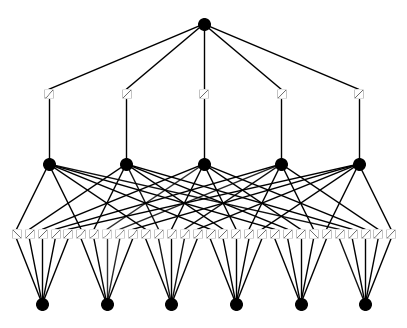

In [42]:
# 绘制初始化时的KAN模型图形
model(dataset['train_input']);
# 使用 plot 方法绘制模型的输出结果
# 设置 beta 参数为 100，用于控制平滑度
model.plot(beta=50)

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]c:\Users\74860\Desktop\deep learning\kanmodel\kan\KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
train loss: 1.79e+00 | test loss: 1.52e+00 | reg: 1.17e+01 : 100%|██| 40/40 [00:29<00:00,  1.34it/s]


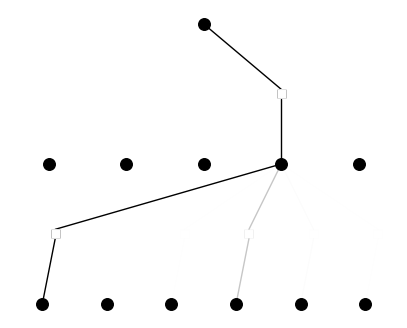

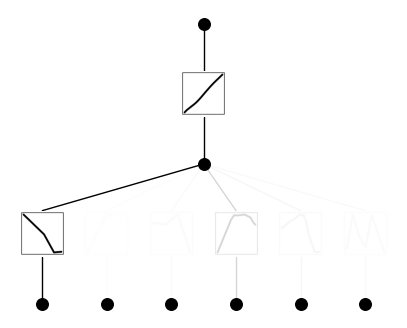

In [43]:
model.train(dataset, opt="LBFGS", steps=40, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 1.79e+00 | test loss: 1.66e+00 | reg: 1.62e+01 : 100%|████| 5/5 [00:00<00:00,  5.21it/s]


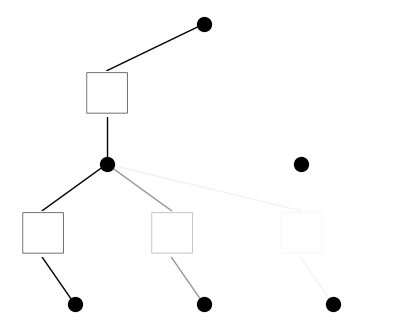

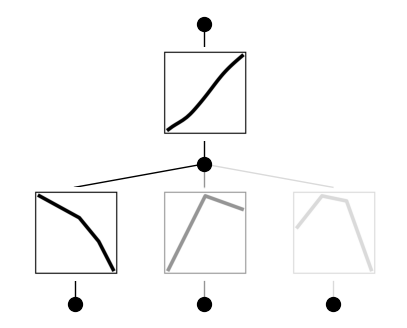

In [12]:
model.train(dataset, opt="LBFGS", steps=5, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

In [44]:
# 设置 mode 变量为 "auto" 或 "manual"，以确定激活函数的设置方式
mode = "auto"  # 或者 mode = "manual"
# 如果 mode 是 "manual"，则手动设置激活函数为符号函数
if mode == "manual":
    # 手动模式下，逐个指定隐藏层和输入层的激活函数
    # 第一个参数表示层的索引，第二个和第三个参数表示神经元的索引
    # 第四个参数为要设置的激活函数，例如 'sin', 'x^2', 'exp' 等
    model.fix_symbolic(0,0,0,'x'); # 设置第一个隐藏层的第一个神经元的激活函数为正弦函数
    model.fix_symbolic(0,1,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,2,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(1,0,0,'x'); # 设置输出层的第一个神经元的激活函数为指数函数
# 如果 mode 是 "auto"，则自动设置激活函数为符号函数
elif mode == "auto":
    # 自动模式下，根据提供的激活函数库自动选择合适的符号函数作为激活函数
    lib = ['x','abs','x^2','sin']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999760637806193
fixing (0,1,0) with x^2, r2=0.9999999999588262
fixing (0,2,0) with sin, r2=0.8734410387468514
fixing (0,3,0) with x^2, r2=0.998095057465798
fixing (0,4,0) with sin, r2=0.8960578691095291
fixing (0,5,0) with sin, r2=0.995176639745872
fixing (1,0,0) with sin, r2=0.9997495111983884


In [45]:
model.symbolic_formula()[0][0] # 获取模型的符号化公式


1.45*sin(0.02*(1 - 0.68*x_2)**2 + 0.86*(1 - 0.17*x_4)**2 - 0.11*sin(3.25*x_1 - 3.2) + 1.03*sin(3.16*x_3 + 9.42) + 0.66*sin(0.16*x_5 - 8.61) - 0.11*sin(4.2*x_6 + 3.99) - 15.66) + 10.7

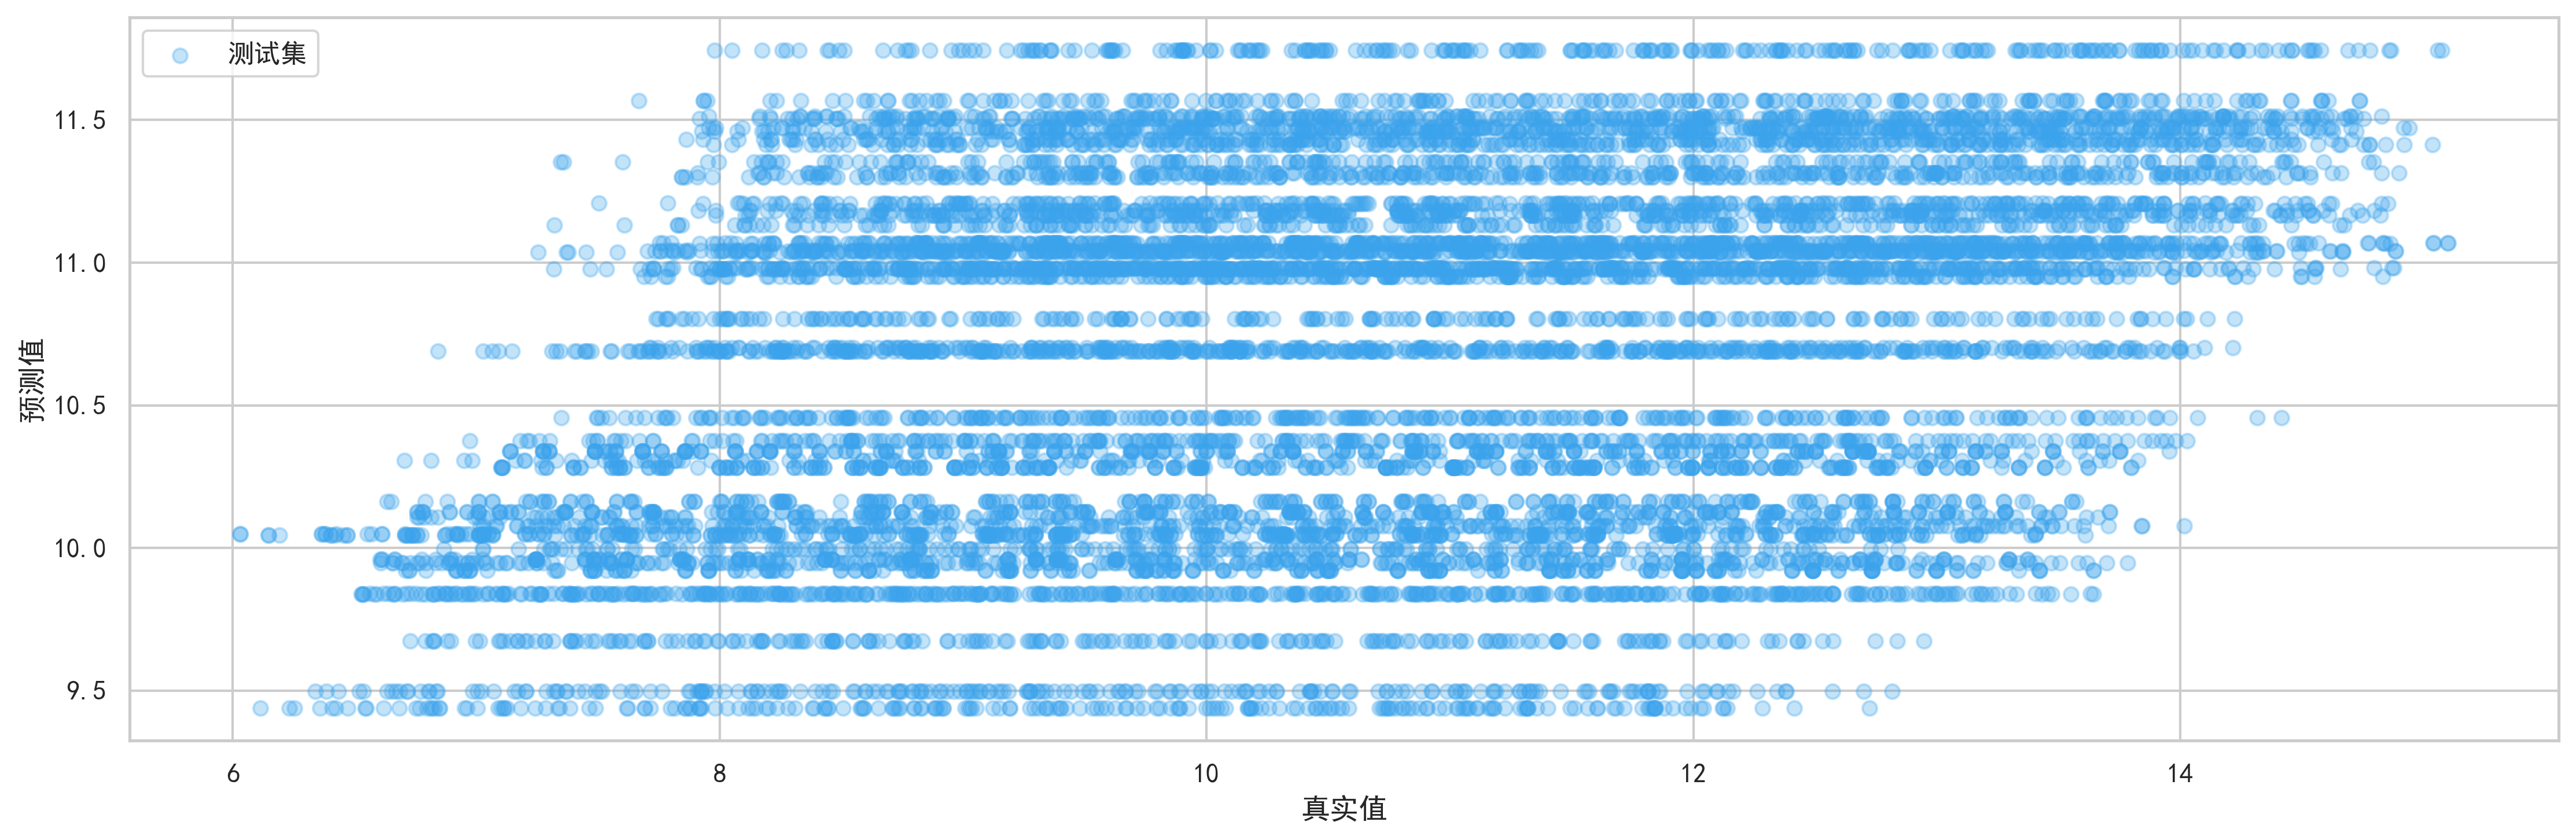

In [47]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统使用SimHei字体
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False
formula = model.symbolic_formula()[0][0]
prediction = []
 
def acc(formula, X):
    batch = X.shape[0]  # 获取批量大小
    for i in range(batch):
        subs_dict = {
            'x_1': X[i, 0],
            'x_2': X[i, 1],
            'x_3': X[i, 2],
            'x_4': X[i, 3],
            'x_5': X[i, 4],
            'x_6': X[i, 5]
        }
        # 使用给定的公式对当前样本进行预测，并将结果转换为浮点数
        predict = float(formula.subs(subs_dict))
        prediction.append(predict)  # 将预测结果添加到列表中   
    return prediction
 
test_pred = acc(formula, dataset['train_input'])
 
y_test_h =y_train
pred_test_h = test_pred
 
import seaborn as sns
colors = sns.color_palette("husl", 3)
 
plt.figure(figsize=(15,5),dpi=300)
plt.scatter(y_test_h, pred_test_h, label='测试集', alpha=0.3, color=colors[2])
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.legend()
plt.tight_layout()
plt.show()

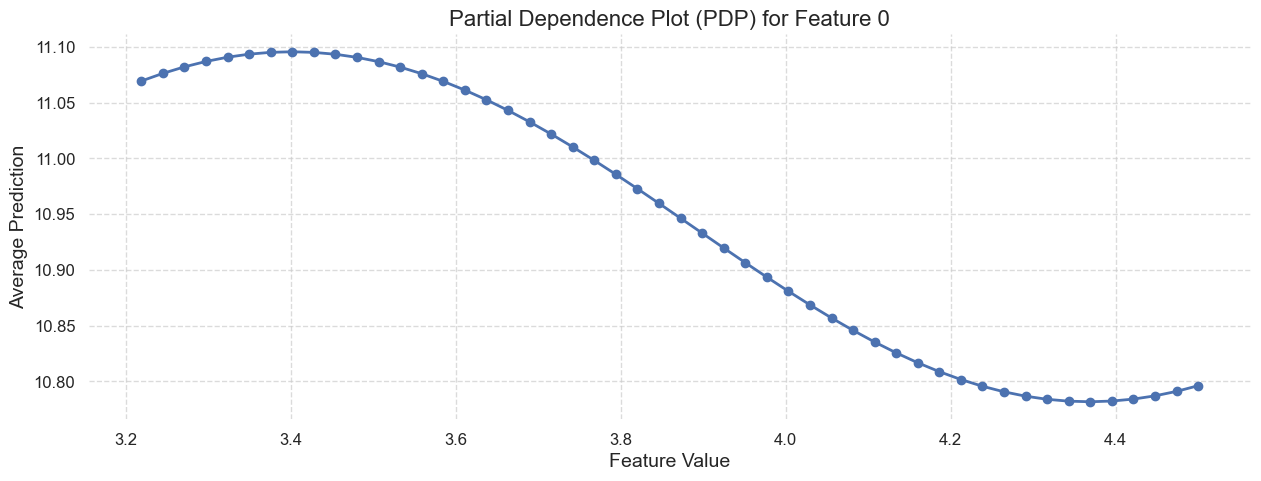

In [48]:
import seaborn as sns
# 定义部分依赖函数
def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i+1): value if i == feature_idx else dataset['train_input'][0, i]
            for i in range(dataset['train_input'].shape[1])
        }
        predict = float(formula.subs(subs_dict))
        predictions.append(predict)
    return np.array(predictions)
 
# dataset 是你的数据集，formula 是你的模型公式
 
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp = 0  # 假设选择第一个特征进行 PDP
feature_values_pdp = np.linspace(min(dataset['train_input'].cpu()[:, feature_index_pdp]), max(dataset['train_input'].cpu()[:, feature_index_pdp]), num=50)
 
# 计算部分依赖
predictions_pdp = partial_dependence(feature_index_pdp, feature_values_pdp, formula, dataset)
 
# 绘制部分依赖图（PDP）
# 设置Seaborn样式
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.plot(feature_values_pdp, predictions_pdp, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
# 添加标题和轴标签，并设置字体大小
plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Average Prediction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
sns.despine(left=True, bottom=True)
plt.show()

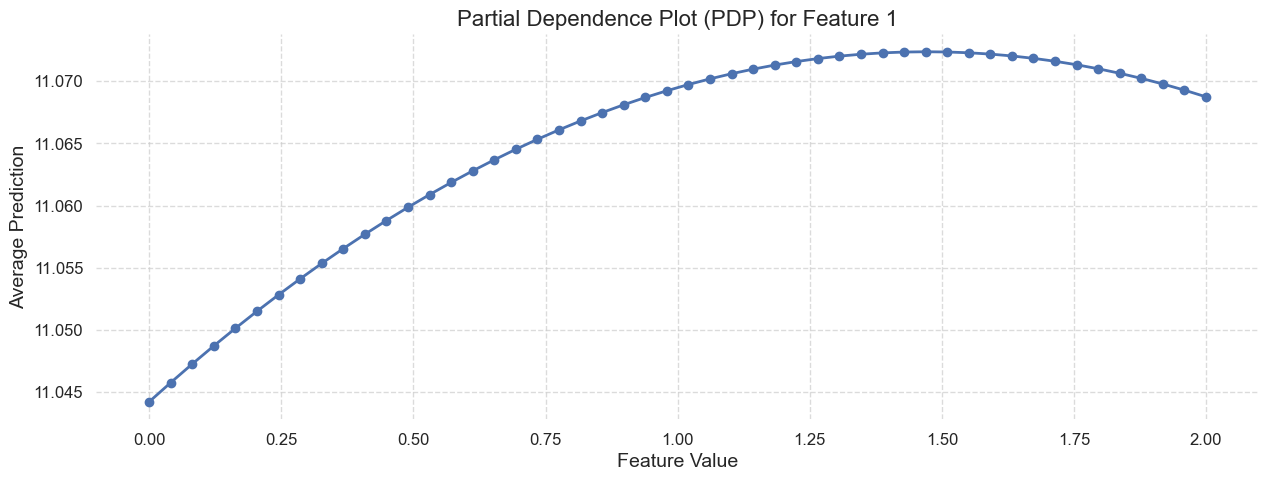

In [49]:
import seaborn as sns
# 定义部分依赖函数
def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i+1): value if i == feature_idx else dataset['train_input'][0, i]
            for i in range(dataset['train_input'].shape[1])
        }
        predict = float(formula.subs(subs_dict))
        predictions.append(predict)
    return np.array(predictions)
 
# dataset 是你的数据集，formula 是你的模型公式
 
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp = 1  # 假设选择第一个特征进行 PDP
feature_values_pdp = np.linspace(min(dataset['train_input'].cpu()[:, feature_index_pdp]), max(dataset['train_input'].cpu()[:, feature_index_pdp]), num=50)
 
# 计算部分依赖
predictions_pdp = partial_dependence(feature_index_pdp, feature_values_pdp, formula, dataset)
 
# 绘制部分依赖图（PDP）
# 设置Seaborn样式
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.plot(feature_values_pdp, predictions_pdp, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
# 添加标题和轴标签，并设置字体大小
plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Average Prediction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
sns.despine(left=True, bottom=True)
plt.show()

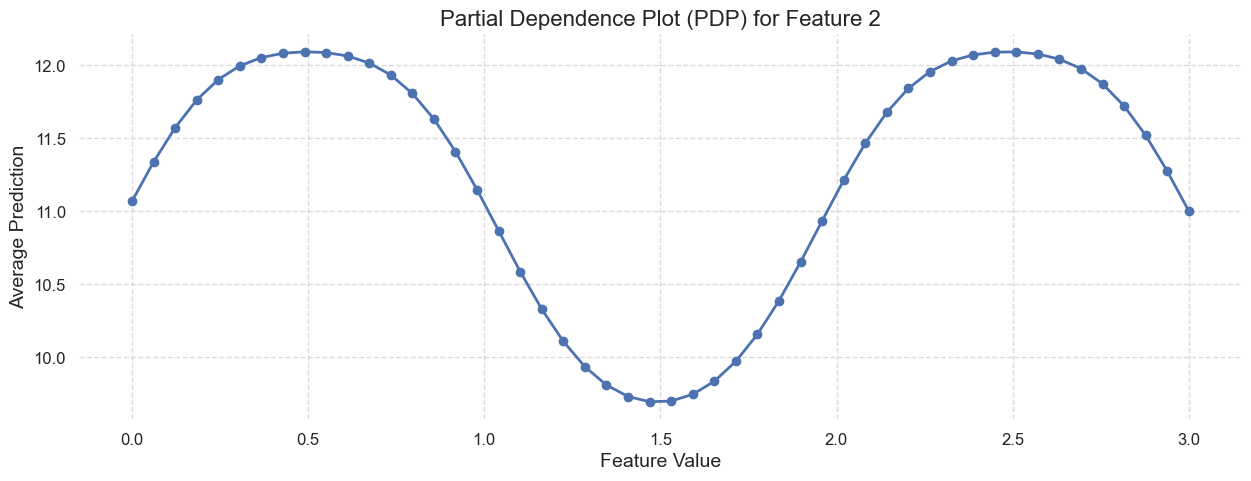

In [50]:
import seaborn as sns
# 定义部分依赖函数
def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i+1): value if i == feature_idx else dataset['train_input'][0, i]
            for i in range(dataset['train_input'].shape[1])
        }
        predict = float(formula.subs(subs_dict))
        predictions.append(predict)
    return np.array(predictions)
 
# dataset 是你的数据集，formula 是你的模型公式
 
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp = 2  # 假设选择第一个特征进行 PDP
feature_values_pdp = np.linspace(min(dataset['train_input'].cpu()[:, feature_index_pdp]), max(dataset['train_input'].cpu()[:, feature_index_pdp]), num=50)
 
# 计算部分依赖
predictions_pdp = partial_dependence(feature_index_pdp, feature_values_pdp, formula, dataset)
 
# 绘制部分依赖图（PDP）
# 设置Seaborn样式
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.plot(feature_values_pdp, predictions_pdp, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
# 添加标题和轴标签，并设置字体大小
plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Average Prediction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
sns.despine(left=True, bottom=True)
plt.show()

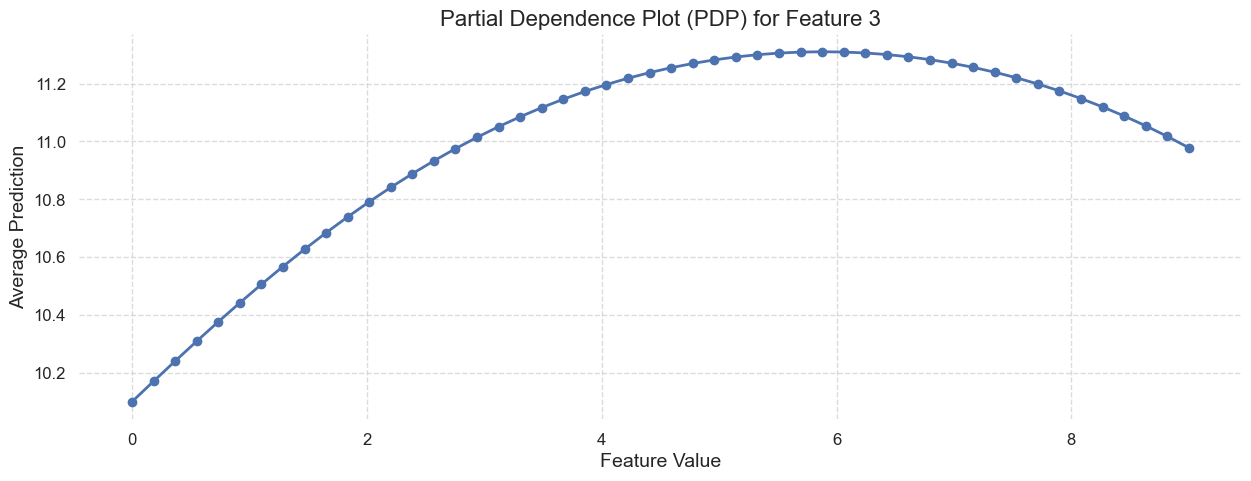

In [51]:
import seaborn as sns
# 定义部分依赖函数
def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i+1): value if i == feature_idx else dataset['train_input'][0, i]
            for i in range(dataset['train_input'].shape[1])
        }
        predict = float(formula.subs(subs_dict))
        predictions.append(predict)
    return np.array(predictions)
 
# dataset 是你的数据集，formula 是你的模型公式
 
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp = 3  # 假设选择第一个特征进行 PDP
feature_values_pdp = np.linspace(min(dataset['train_input'].cpu()[:, feature_index_pdp]), max(dataset['train_input'].cpu()[:, feature_index_pdp]), num=50)
 
# 计算部分依赖
predictions_pdp = partial_dependence(feature_index_pdp, feature_values_pdp, formula, dataset)
 
# 绘制部分依赖图（PDP）
# 设置Seaborn样式
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.plot(feature_values_pdp, predictions_pdp, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
# 添加标题和轴标签，并设置字体大小
plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Average Prediction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
sns.despine(left=True, bottom=True)
plt.show()

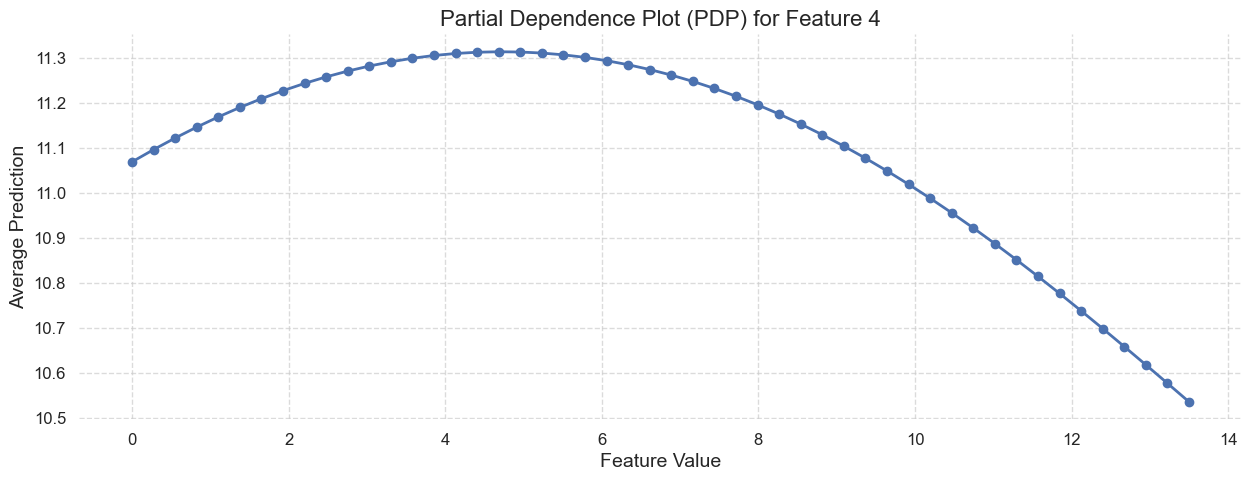

In [52]:
import seaborn as sns
# 定义部分依赖函数
def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i+1): value if i == feature_idx else dataset['train_input'][0, i]
            for i in range(dataset['train_input'].shape[1])
        }
        predict = float(formula.subs(subs_dict))
        predictions.append(predict)
    return np.array(predictions)
 
# dataset 是你的数据集，formula 是你的模型公式
 
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp = 4  # 假设选择第一个特征进行 PDP
feature_values_pdp = np.linspace(min(dataset['train_input'].cpu()[:, feature_index_pdp]), max(dataset['train_input'].cpu()[:, feature_index_pdp]), num=50)
 
# 计算部分依赖
predictions_pdp = partial_dependence(feature_index_pdp, feature_values_pdp, formula, dataset)
 
# 绘制部分依赖图（PDP）
# 设置Seaborn样式
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.plot(feature_values_pdp, predictions_pdp, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
# 添加标题和轴标签，并设置字体大小
plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Average Prediction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
sns.despine(left=True, bottom=True)
plt.show()

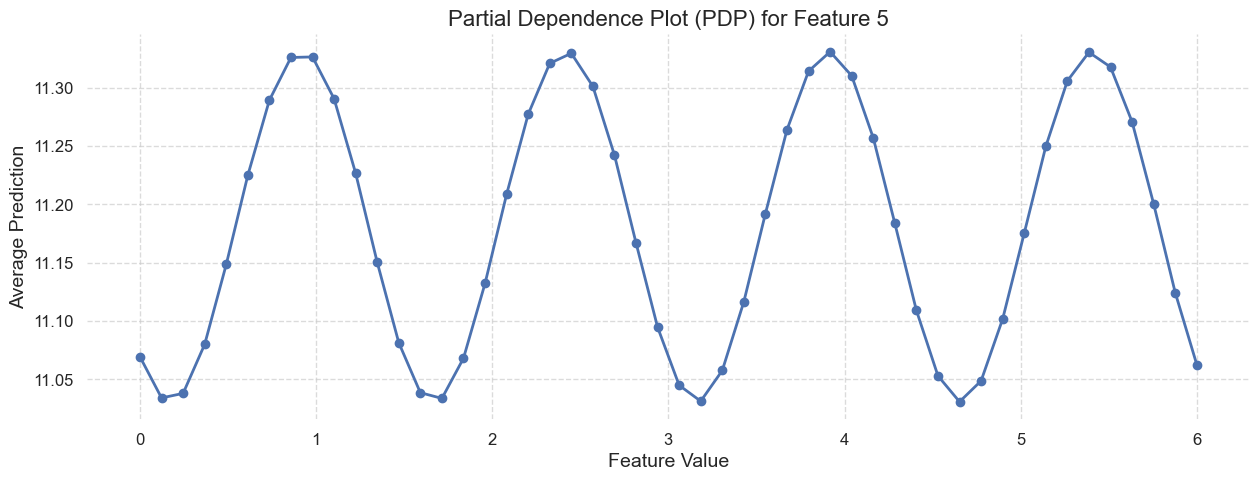

In [53]:
import seaborn as sns
# 定义部分依赖函数
def partial_dependence(feature_idx, feature_values, formula, dataset):
    predictions = []
    for value in feature_values:
        subs_dict = {
            'x_{}'.format(i+1): value if i == feature_idx else dataset['train_input'][0, i]
            for i in range(dataset['train_input'].shape[1])
        }
        predict = float(formula.subs(subs_dict))
        predictions.append(predict)
    return np.array(predictions)
 
# dataset 是你的数据集，formula 是你的模型公式
 
# 选择要绘制部分依赖图的特征索引和范围
feature_index_pdp = 5  # 假设选择第一个特征进行 PDP
feature_values_pdp = np.linspace(min(dataset['train_input'].cpu()[:, feature_index_pdp]), max(dataset['train_input'].cpu()[:, feature_index_pdp]), num=50)
 
# 计算部分依赖
predictions_pdp = partial_dependence(feature_index_pdp, feature_values_pdp, formula, dataset)
 
# 绘制部分依赖图（PDP）
# 设置Seaborn样式
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.plot(feature_values_pdp, predictions_pdp, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
# 添加标题和轴标签，并设置字体大小
plt.title('Partial Dependence Plot (PDP) for Feature {}'.format(feature_index_pdp), fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Average Prediction', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
# 添加背景和框架
sns.despine(left=True, bottom=True)
plt.show()

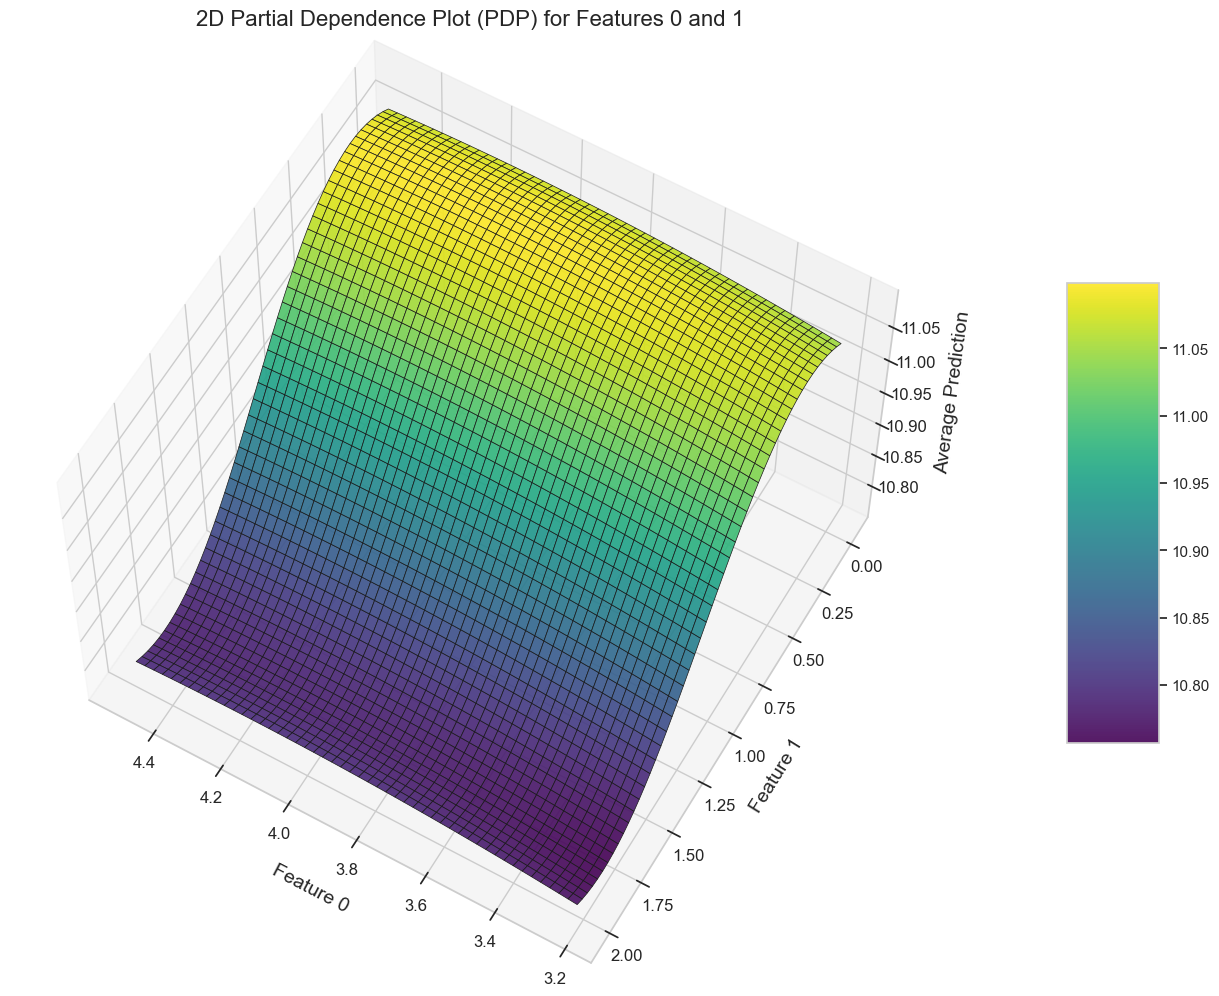

In [54]:
from mpl_toolkits.mplot3d import Axes3D
# 定义二维部分依赖函数
def partial_dependence_2d(feature_idx1, feature_idx2, feature_values1, feature_values2, formula, dataset):
    predictions = np.zeros((len(feature_values1), len(feature_values2)))
    for i, value1 in enumerate(feature_values1):
        for j, value2 in enumerate(feature_values2):
            subs_dict = {
                'x_{}'.format(k+1): value1 if k == feature_idx1 else value2 if k == feature_idx2 else dataset['train_input'][0, k]
                for k in range(dataset['train_input'].shape[1])
            }
            predict = float(formula.subs(subs_dict))
            predictions[i, j] = predict
    return predictions
# 选择要绘制二维部分依赖图的特征索引和范围
feature_index1 = 0  # 第一个特征索引
feature_index2 = 1  # 第二个特征索引
feature_values1 = np.linspace(min(dataset['train_input'].cpu()[:, feature_index1]), max(dataset['train_input'].cpu()[:, feature_index1]), num=50)
feature_values2 = np.linspace(min(dataset['train_input'].cpu()[:, feature_index2]), max(dataset['train_input'].cpu()[:, feature_index2]), num=50)
# 计算二维部分依赖
predictions_2d_pdp = partial_dependence_2d(feature_index1, feature_index2, feature_values1, feature_values2, formula, dataset)
# 绘制二维部分依赖图（2D PDP）
sns.set(style="whitegrid")
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
# 创建网格
X, Y = np.meshgrid(feature_values1, feature_values2)
surf = ax.plot_surface(X, Y, predictions_2d_pdp, cmap='viridis', edgecolor='k', linewidth=0.5, alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)
ax.set_xlabel('Feature {}'.format(feature_index1), fontsize=14, labelpad=10)
ax.set_ylabel('Feature {}'.format(feature_index2), fontsize=14, labelpad=10)
ax.set_zlabel('Average Prediction', fontsize=14, labelpad=10)
ax.set_title('2D Partial Dependence Plot (PDP) for Features {} and {}'.format(feature_index1, feature_index2), fontsize=16, pad=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 设置视角
ax.view_init(elev=60, azim=120)
plt.tight_layout()
plt.show()

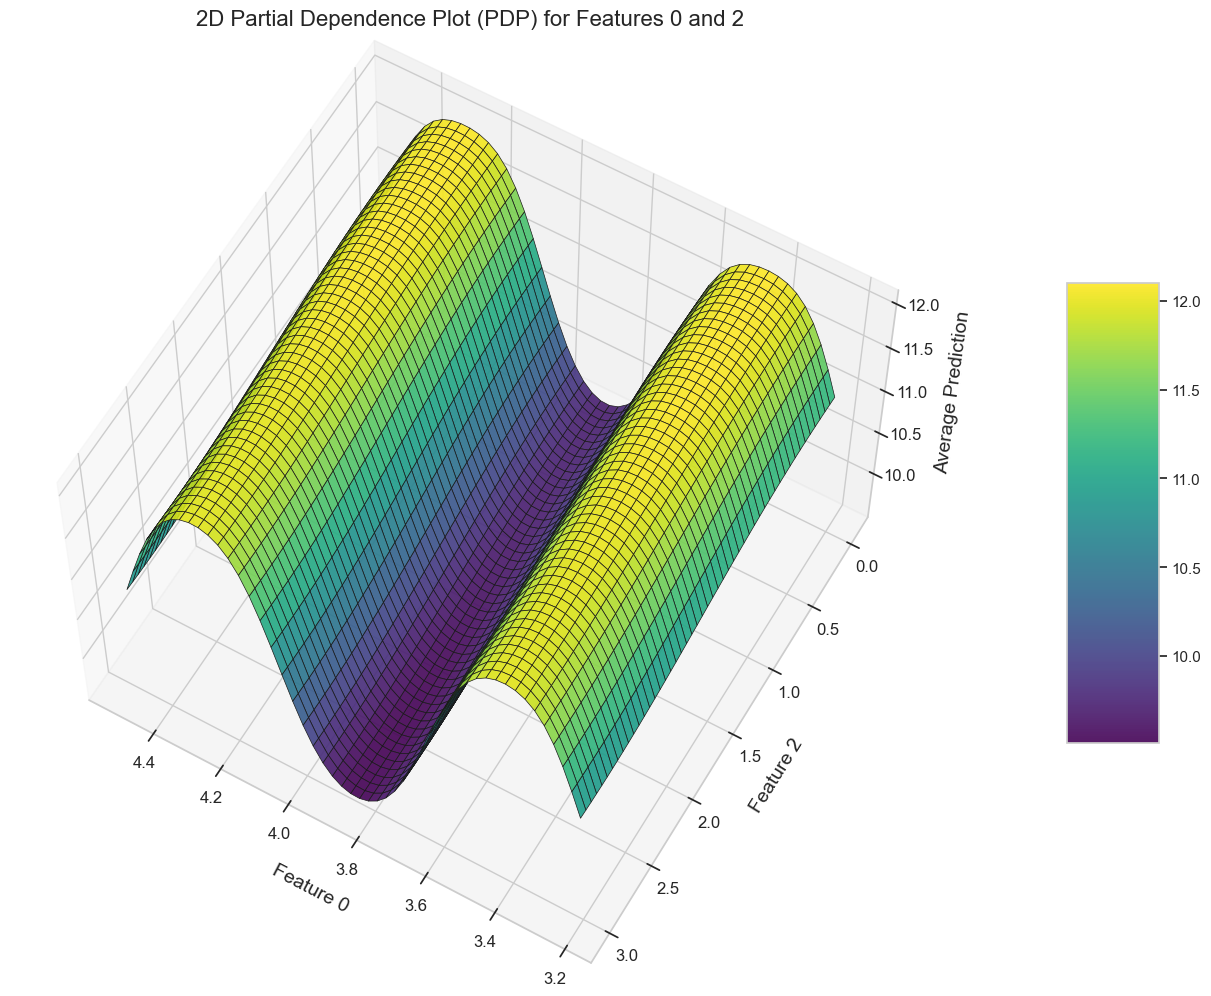

In [55]:
from mpl_toolkits.mplot3d import Axes3D
# 定义二维部分依赖函数
def partial_dependence_2d(feature_idx1, feature_idx2, feature_values1, feature_values2, formula, dataset):
    predictions = np.zeros((len(feature_values1), len(feature_values2)))
    for i, value1 in enumerate(feature_values1):
        for j, value2 in enumerate(feature_values2):
            subs_dict = {
                'x_{}'.format(k+1): value1 if k == feature_idx1 else value2 if k == feature_idx2 else dataset['train_input'][0, k]
                for k in range(dataset['train_input'].shape[1])
            }
            predict = float(formula.subs(subs_dict))
            predictions[i, j] = predict
    return predictions
# 选择要绘制二维部分依赖图的特征索引和范围
feature_index1 = 0  # 第一个特征索引
feature_index2 = 2  # 第二个特征索引
feature_values1 = np.linspace(min(dataset['train_input'].cpu()[:, feature_index1]), max(dataset['train_input'].cpu()[:, feature_index1]), num=50)
feature_values2 = np.linspace(min(dataset['train_input'].cpu()[:, feature_index2]), max(dataset['train_input'].cpu()[:, feature_index2]), num=50)
# 计算二维部分依赖
predictions_2d_pdp = partial_dependence_2d(feature_index1, feature_index2, feature_values1, feature_values2, formula, dataset)
# 绘制二维部分依赖图（2D PDP）
sns.set(style="whitegrid")
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
# 创建网格
X, Y = np.meshgrid(feature_values1, feature_values2)
surf = ax.plot_surface(X, Y, predictions_2d_pdp, cmap='viridis', edgecolor='k', linewidth=0.5, alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)
ax.set_xlabel('Feature {}'.format(feature_index1), fontsize=14, labelpad=10)
ax.set_ylabel('Feature {}'.format(feature_index2), fontsize=14, labelpad=10)
ax.set_zlabel('Average Prediction', fontsize=14, labelpad=10)
ax.set_title('2D Partial Dependence Plot (PDP) for Features {} and {}'.format(feature_index1, feature_index2), fontsize=16, pad=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 设置视角
ax.view_init(elev=60, azim=120)
plt.tight_layout()
plt.show()

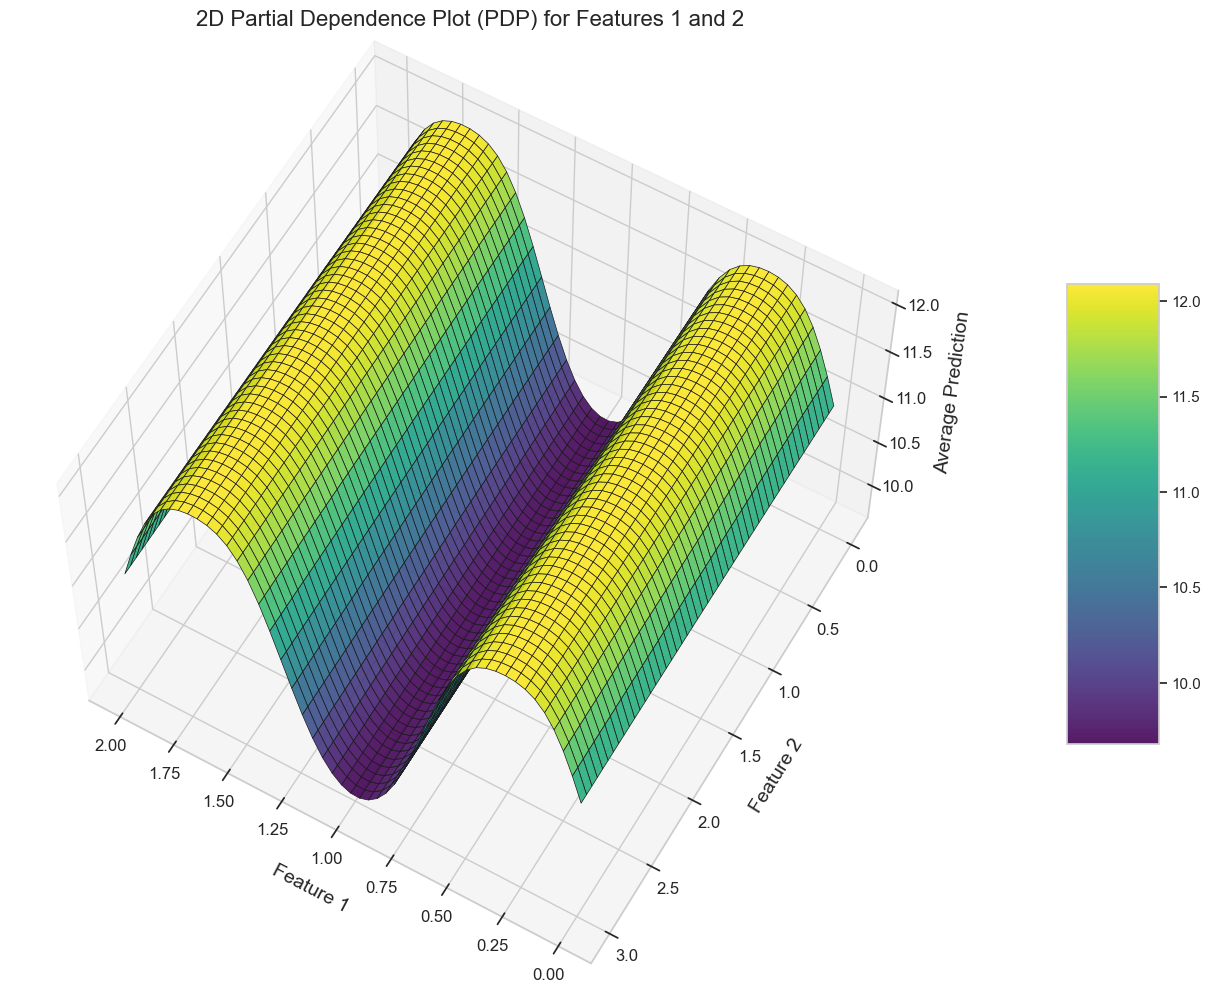

In [56]:
from mpl_toolkits.mplot3d import Axes3D
# 定义二维部分依赖函数
def partial_dependence_2d(feature_idx1, feature_idx2, feature_values1, feature_values2, formula, dataset):
    predictions = np.zeros((len(feature_values1), len(feature_values2)))
    for i, value1 in enumerate(feature_values1):
        for j, value2 in enumerate(feature_values2):
            subs_dict = {
                'x_{}'.format(k+1): value1 if k == feature_idx1 else value2 if k == feature_idx2 else dataset['train_input'][0, k]
                for k in range(dataset['train_input'].shape[1])
            }
            predict = float(formula.subs(subs_dict))
            predictions[i, j] = predict
    return predictions
# 选择要绘制二维部分依赖图的特征索引和范围
feature_index1 = 1  # 第一个特征索引
feature_index2 = 2  # 第二个特征索引
feature_values1 = np.linspace(min(dataset['train_input'].cpu()[:, feature_index1]), max(dataset['train_input'].cpu()[:, feature_index1]), num=50)
feature_values2 = np.linspace(min(dataset['train_input'].cpu()[:, feature_index2]), max(dataset['train_input'].cpu()[:, feature_index2]), num=50)
# 计算二维部分依赖
predictions_2d_pdp = partial_dependence_2d(feature_index1, feature_index2, feature_values1, feature_values2, formula, dataset)
# 绘制二维部分依赖图（2D PDP）
sns.set(style="whitegrid")
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
# 创建网格
X, Y = np.meshgrid(feature_values1, feature_values2)
surf = ax.plot_surface(X, Y, predictions_2d_pdp, cmap='viridis', edgecolor='k', linewidth=0.5, alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.1)
ax.set_xlabel('Feature {}'.format(feature_index1), fontsize=14, labelpad=10)
ax.set_ylabel('Feature {}'.format(feature_index2), fontsize=14, labelpad=10)
ax.set_zlabel('Average Prediction', fontsize=14, labelpad=10)
ax.set_title('2D Partial Dependence Plot (PDP) for Features {} and {}'.format(feature_index1, feature_index2), fontsize=16, pad=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 设置视角
ax.view_init(elev=60, azim=120)
plt.tight_layout()
plt.show()